In [1]:
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table
import pandas as pd

In [2]:
r = ascii.read('./filters/r_subaru.res')
J = ascii.read('./filters/J_uv.res')
NUV = ascii.read('./filters/galex2500.res')

In [3]:
fname = 'test.ised_ASCII' # 62 for solar metalliciity

In [4]:
with open(fname, 'r') as file:
    lines = file.readlines()

In [5]:
ages = lines[0] #256
ages = ages[15:-1]
ages = [x for x in ages.split(' ') if x is not ' ' and x is not '']
ages = [float(x) for x in ages]

In [79]:
ages = np.array(ages)

In [7]:
lambdas = lines[6][15:-1] #6900
lambdas = [x for x in lambdas.split(' ') if x is not ' ' and x is not '']
lambdas = [float(x) for x in lambdas]

In [8]:
lambdas = np.array(lambdas)

In [21]:
# r-J, NUV - r

rs = []
Js = []
NUVs = []

In [22]:
for i in range(7, 263):
    datas = lines[i][15:-1]
    datas = [x for x in datas.split(' ') if x is not ' ' and x is not '']
    datas = [float(x) for x in datas]
    
    datas = np.array(datas)
    
    wave_r = np.arange(min(r['col1']), max(r['col1']), 1.0)
    weight_r = np.interp(wave_r, r['col1'], r['col2'])

    wave_J = np.arange(min(J['col1']), max(J['col1']), 1.0)
    weight_J = np.interp(wave_J, J['col1'], J['col2'])

    wave_NUV = np.arange(int(min(NUV['col1'])), int(max(NUV['col1'])), 1.0)
    weight_NUV = np.interp(wave_NUV, NUV['col1'], NUV['col2'])
    
    mask_r = [x for x in range(len(wave_r)) if wave_r[x] in lambdas]
    mask_J = [x for x in range(len(wave_J)) if wave_J[x] in lambdas]
    mask_NUV = [x for x in range(len(wave_NUV)) if wave_NUV[x] in lambdas]

    
    mask = np.isin(lambdas, wave_r[mask_r])
    rmag = np.log10(sum(datas[:6900][mask] * weight_r[mask_r])) * -2.5

    mask = np.isin(lambdas, wave_J[mask_J])
    Jmag = np.log10(sum(datas[:6900][mask] * weight_J[mask_J])) * -2.5

    mask = np.isin(lambdas, wave_NUV[mask_NUV])
    NUVmag = np.log10(sum(datas[:6900][mask] * weight_NUV[mask_NUV])) * -2.5
    
    rs.append(rmag)
    Js.append(Jmag)
    NUVs.append(NUVmag)

rs = np.array(rs)
Js = np.array(Js)
NUVs = np.array(NUVs)

/home/ehko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/home/ehko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
/home/ehko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10


In [41]:
datas = lines[200][15:-1]
datas = [x for x in datas.split(' ') if x is not ' ' and x is not '']
datas = [float(x) for x in datas]

datas = np.array(datas)

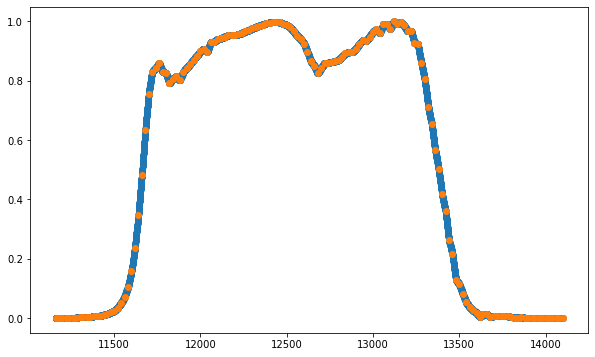

In [44]:
plt.figure(figsize = (10, 6))
plt.scatter(wave_J, weight_J)

plt.scatter(J['col1'], J['col2'])

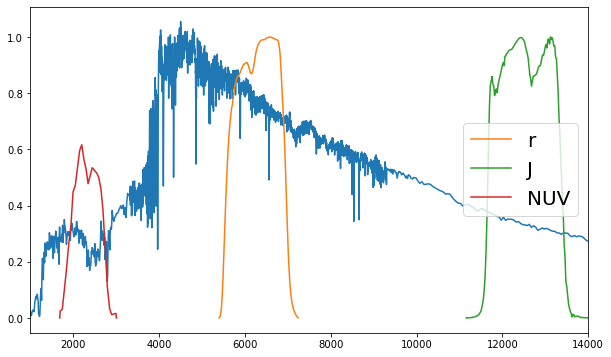

In [78]:
plt.figure(figsize = (10, 6))
plt.plot(lambdas, datas[:6900]/ 7e6)
plt.plot(r['col1'], r['col2'], label = 'r')
plt.plot(J['col1'], J['col2'], label = 'J')
plt.plot(NUV['col1'], NUV['col2'], label = 'NUV')

plt.legend(fontsize = 20)
plt.xlim(1000, 14000)

plt.savefig('sed.png')

In [77]:
NUVmag, rmag, Jmag

(-14.820408230923443, -22.566816258328775, -18.161574685600627)

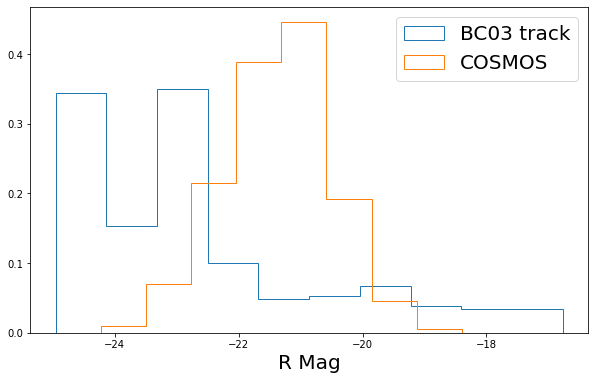

In [55]:
plt.figure(figsize = (10, 6))
plt.hist(rs[1:], histtype = 'step', density = True, label = 'BC03 track')
plt.hist(total_z['RMag'], histtype = 'step', density = True, label = 'COSMOS')

plt.legend(fontsize = 20)

plt.xlabel('R Mag', fontsize = 20)
plt.savefig('rmag.png')

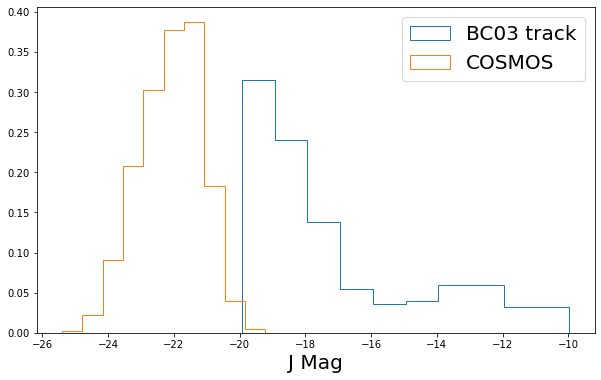

In [56]:
plt.figure(figsize = (10, 6))

plt.hist(Js[1:], histtype = 'step', density = True, label = 'BC03 track')
plt.hist(total_z['JMag'], histtype = 'step', density = True,  label = 'COSMOS')

plt.legend(fontsize = 20)

plt.xlabel('J Mag', fontsize = 20)

plt.savefig('jmag.png')

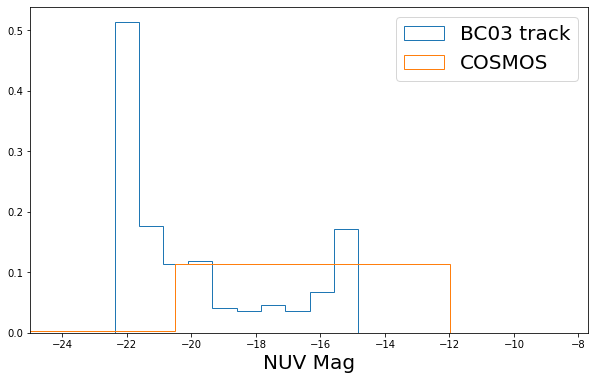

In [57]:
plt.figure(figsize = (10, 6))

plt.hist(NUVs[1:], histtype = 'step', density = True, label = 'BC03 track')
plt.hist(total_z['NUVMag'], histtype = 'step', density = True, label = 'COSMOS')
plt.xlim(-25, )

plt.legend(fontsize = 20)

plt.xlabel('NUV Mag', fontsize = 20)

plt.savefig('nuvmag.png')

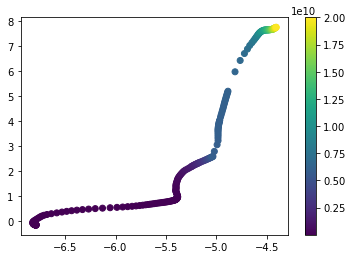

In [11]:
plt.scatter(rmJ, NUVmr, c = ages)
plt.colorbar()

In [12]:
rmJ = np.array(rmJ)
NUVmr = np.array(NUVmr)

In [13]:
Jmag, rmag, NUVmag

(-18.161574685600627, -22.566816258328775, -14.820408230923443)

In [14]:
total = Table.read('./datas/cosmos2015_part')
total_z = total[(total['zphot'] > 0.65) & (total['OType'] == 0) & (total['Mass'] > 9.516)]

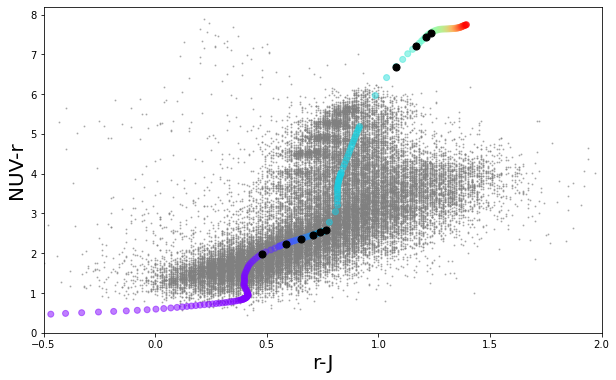

In [60]:
plt.figure(figsize = (10, 6))
plt.scatter(total_z['RMag'] - total_z['JMag'], total_z['NUVMag'] - total_z['RMag'], s = 1, color = 'grey', alpha = .5)

plt.scatter(rmJ+5.8, NUVmr, c = ages, alpha = .5, cmap = 'rainbow')
plt.scatter(rmJ[[0, 135, 144, 152, 156, 160, 164, 203, 207, 211, 215]]+5.8, NUVmr[[0, 135, 144, 152, 156, 160, 164, 203, 207, 211, 215]], color = 'black', s = 50)


plt.xlim(-0.5, 2.0)
plt.ylim(0, 8.2)
plt.xlabel('r-J', fontsize = 20)
plt.ylabel('NUV-r', fontsize = 20)

plt.savefig('evtrack.png')

In [16]:
rmJ[[0, 135, 144, 152, 156, 160, 164, 203, 207, 211, 215]]

array([        nan, -5.32242161, -5.21514927, -5.14572501, -5.09490843,
       -5.06040663, -5.03327126, -4.72106173, -4.62976846, -4.58849366,
       -4.56453528])

In [17]:
#0, 135, 144, 152, 156, 160, 164, 203, 207, 211, 215

ages[164]

6000000000.0

In [18]:
ages[215]

10000000000.0

In [19]:
ages[212]

9249999870.0

In [20]:
total_z

recno,RAJ2000,DEJ2000,Seq,Xpos,Ypos,errX2,errY2,errXY,Area,Rad,Krad,E(B-V),Sat,Cfl,Deep,Flag,FKsap2,e_FKsap2,FKsap3,e_FKsap3,Ksmagap2,e_Ksmagap2,Ksmagap3,e_Ksmagap3,Ksmag,e_Ksmag,KsmagISO,e_KsmagISO,FlKs,f_KsmagISO,FYap2,e_FYap2,FYap3,e_FYap3,Ymagap2,e_Ymagap2,Ymagap3,e_Ymagap3,Ymag,e_Ymag,YmagISO,e_YmagISO,FlY,f_YmagISO,FHap2,e_FHap2,FHap3,e_FHap3,Hmagap2,e_Hmagap2,Hmagap3,e_Hmagap3,Hmag,e_Hmag,HmagISO,e_HmagISO,FlH,f_HmagISO,FJap2,e_FJap2,FJap3,e_FJap3,Jmagap2,e_Jmagap2,Jmagap3,e_Jmagap3,Jmag,e_Jmag,JmagISO,e_JmagISO,FlJ,f_JmagISO,FBap2,e_FBap2,FBap3,e_FBap3,Bmagap2,e_Bmagap2,Bmagap3,e_Bmagap3,Bmag,e_Bmag,BmagISO,e_BmagISO,FlB,f_BmagISO,FVap2,e_FVap2,FVap3,e_FVap3,Vmagap2,e_Vmagap2,Vmagap3,e_Vmagap3,Vmag,e_Vmag,VmagISO,e_VmagISO,FlV,f_VmagISO,Fipap2,e_Fipap2,Fipap3,e_Fipap3,ipmagap2,e_ipmagap2,ipmagap3,e_ipmagap3,ipmag,e_ipmag,ipmagISO,e_ipmagISO,Flip,f_ipmagISO,Frap2,e_Frap2,Frap3,e_Frap3,rmagap2,e_rmagap2,rmagap3,e_rmagap3,rmag,e_rmag,rmagISO,e_rmagISO,Flr,f_rmagISO,Fuap2,e_Fuap2,Fuap3,e_Fuap3,umagap2,e_umagap2,umagap3,e_umagap3,umag,e_umag,umagISO,e_umagISO,Flu,f_umagISO,Fzpap2,e_Fzpap2,Fzpap3,e_Fzpap3,zpmagap2,e_zpmagap2,zpmagap3,e_zpmagap3,zpmag,e_zpmag,zpmagISO,e_zpmagISO,Flzp,f_zpmagISO,Fzppap2,e_Fzppap2,Fzppap3,e_Fzppap3,zppmagap2,e_zppmagap2,zppmagap3,e_zppmagap3,zppmag,e_zppmag,zppmagISO,e_zppmagISO,Flzpp,f_zppmagISO,FIA484ap2,e_FIA484ap2,FIA484ap3,e_FIA484ap3,IA484ap2,e_IA484ap2,IA484ap3,e_IA484ap3,IA484,e_IA484,IA484ISO,e_IA484ISO,FlIA484,f_IA484ISO,FIA527ap2,e_FIA527ap2,FIA527ap3,e_FIA527ap3,IA527ap2,e_IA527ap2,IA527ap3,e_IA527ap3,IA527,e_IA527,IA527ISO,e_IA527ISO,FlIA527,f_IA527ISO,FIA624ap2,e_FIA624ap2,FIA624ap3,e_FIA624ap3,IA624ap2,e_IA624ap2,IA624ap3,e_IA624ap3,IA624,e_IA624,IA624ISO,e_IA624ISO,FlIA624,f_IA624ISO,FIA679ap2,e_FIA679ap2,FIA679ap3,e_FIA679ap3,IA679ap2,e_IA679ap2,IA679ap3,e_IA679ap3,IA679,e_IA679,IA679ISO,e_IA679ISO,FlIA679,f_IA679ISO,FIA738ap2,e_FIA738ap2,FIA738ap3,e_FIA738ap3,IA738ap2,e_IA738ap2,IA738ap3,e_IA738ap3,IA738,e_IA738,IA738ISO,e_IA738ISO,FlIA738,f_IA738ISO,FIA767ap2,e_FIA767ap2,FIA767ap3,e_FIA767ap3,IA767ap2,e_IA767ap2,IA767ap3,e_IA767ap3,IA767,e_IA767,IA767ISO,e_IA767ISO,FlIA767,f_IA767ISO,FIB427ap2,e_FIB427ap2,FIB427ap3,e_FIB427ap3,IB427ap2,e_IB427ap2,IB427ap3,e_IB427ap3,IB427,e_IB427,IB427ISO,e_IB427ISO,FlIB427,f_IB427ISO,FIB464ap2,e_FIB464ap2,FIB464ap3,e_FIB464ap3,IB464ap2,e_IB464ap2,IB464ap3,e_IB464ap3,IB464,e_IB464,IB464ISO,e_IB464ISO,FlIB464,f_IB464ISO,FIB505ap2,e_FIB505ap2,FIB505ap3,e_FIB505ap3,IB505ap2,e_IB505ap2,IB505ap3,e_IB505ap3,IB505,e_IB505,IB505ISO,e_IB505ISO,FlIB505,f_IB505ISO,FIB574ap2,e_FIB574ap2,FIB574ap3,e_FIB574ap3,IB574ap2,e_IB574ap2,IB574ap3,e_IB574ap3,IB574,e_IB574,IB574ISO,e_IB574ISO,FlIB574,f_IB574ISO,FIB709ap2,e_FIB709ap2,FIB709ap3,e_FIB709ap3,IB709ap2,e_IB709ap2,IB709ap3,e_IB709ap3,IB709,e_IB709,IB709ISO,e_IB709ISO,FlIB709,f_IB709ISO,FIB827ap2,e_FIB827ap2,FIB827ap3,e_FIB827ap3,IB827ap2,e_IB827ap2,IB827ap3,e_IB827ap3,IB827,e_IB827,IB827ISO,e_IB827ISO,FlIB827,f_IB827ISO,FNB711ap2,e_FNB711ap2,FNB711ap3,e_FNB711ap3,NB711ap2,e_NB711ap2,NB711ap3,e_NB711ap3,NB711,e_NB711,NB711ISO,e_NB711ISO,FlNB711,f_NB711ISO,FNB816ap2,e_FNB816ap2,FNB816ap3,e_FNB816ap3,NB816ap2,e_NB816ap2,NB816ap3,e_NB816ap3,NB816,e_NB816,NB816ISO,e_NB816ISO,FlNB816,f_NB816ISO,F3_6um,e_F3_6um,3_6mag,e_3_6mag,F4_5um,e_F4_5um,4_5mag,e_4_5mag,F5_8um,e_F5_8um,5_8mag,e_5_8mag,F8_0um,e_F8_0um,8_0mag,e_8_0mag,FHwap2,e_FHwap2,FHwap3,e_FHwap3,Hwmagap2,e_Hwmagap2,Hwmagap3,e_Hwmagap3,Hwmag,e_Hwmag,HwmagISO,e_HwmagISO,FlHw,f_HwmagISO,FKswap2,e_FKswap2,FKswap3,e_FKswap3,Kswmagap2,e_Kswmagap2,Kswmagap3,e_Kswmagap3,Kswmag,e_Kswmag,KswmagISO,e_KswmagISO,FlKsw,f_KswmagISO,FyHap2,e_FyHap2,FyHap3,e_FyHap3,yHmagap2,e_yHmagap2,yHmagap3,e_yHmagap3,yHmag,e_yHmag,yHmagISO,e_yHmagISO,FlyH,f_yHmagISO,F24um,e_F24um,24mag,e_24mag,ID24um,F100um,e_F100um,F160um,e_F160um,F250um,e_F250um,e_F250tot,F350um,e_F350um,e_F350tot,F500um,e_F500um,e_F500tot,Chandra,ID2006,ID2008,ID2013,NUVmag,e_NUVmag,FUVmag,e_FUVmag,Fnuv,e_Fnuv,Ffuv,